In [17]:
import numpy as np #import numpy library
import pandas as pd #import pandas library
import matplotlib.pyplot as plt #import matplot library
%matplotlib inline
import nltk.classify.util
from astropy.table import Table, Column

In [18]:
#load data
saraTotal = pd.read_csv('sarahYee/sarahTotal.csv') #attach Amazon data to a var called data

print(saraTotal.shape) #print data rows and columns
# bioData.head(5) #limit data to 5 rows including a header row 
saraTotal.tail(5) #limit

(4320, 23)


,timestamp,heartrate,steps,calories,gsr,skintemp,airtemp,walk,run,bike,...,happy,happy score,calm,calm score,anxious,anxious score,sad,sad score,angry,angry score
4315,4/25/16 23:55,71,0,1.1,0.000083,89.6,85.1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4316,4/25/16 23:56,70,0,1.0,0.000082,89.6,85.1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4317,4/25/16 23:57,69,0,1.0,0.000082,89.6,85.1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4318,4/25/16 23:58,68,0,1.1,0.000082,89.6,86.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4319,4/25/16 23:59,69,0,1.0,0.000087,89.6,86.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# convert summary NaNs into usable format
saraTotal.gsr = saraTotal.gsr.fillna(0)
saraTotal.heartrate = saraTotal.heartrate.fillna(0)
saraTotal.steps = saraTotal.steps.fillna(0)
saraTotal.calories = saraTotal.calories.fillna(0)
saraTotal.skintemp = saraTotal.skintemp.fillna(0)
saraTotal.airtemp = saraTotal.airtemp.fillna(0)
saraTotal.walk = saraTotal.walk.fillna(0)
saraTotal.run = saraTotal.run.fillna(0)
saraTotal.bike = saraTotal.bike.fillna(0)


In [45]:
saraTotal.tail(5) #limit

,timestamp,heartrate,steps,calories,gsr,skintemp,airtemp,walk,run,bike,...,Anxious,xHeartrate,xSteps,xCalories,xGsr,xSkintemp,xAirtemp,xWalk,xRun,xBike
4315,4/25/16 23:55,71,0,1.1,0.000083,89.6,85.1,1,0,0,...,0,71,0,1.1,0.000083,89.6,85.1,1,0,0
4316,4/25/16 23:56,70,0,1.0,0.000082,89.6,85.1,1,0,0,...,0,70,0,1.0,0.000082,89.6,85.1,1,0,0
4317,4/25/16 23:57,69,0,1.0,0.000082,89.6,85.1,1,0,0,...,0,69,0,1.0,0.000082,89.6,85.1,1,0,0
4318,4/25/16 23:58,68,0,1.1,0.000082,89.6,86.0,0,0,0,...,0,68,0,1.1,0.000082,89.6,86.0,0,0,0
4319,4/25/16 23:59,69,0,1.0,0.000087,89.6,86.0,0,0,0,...,0,69,0,1.0,0.000087,89.6,86.0,0,0,0


In [46]:
print(type(saraTotal.gsr))

<class 'pandas.core.series.Series'>


(array([  4.25700000e+03,   1.80000000e+01,   1.80000000e+01,
          1.20000000e+01,   3.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   6.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  0.  ,   1.05,   2.1 ,   3.15,   4.2 ,   5.25,   6.3 ,   7.35,
          8.4 ,   9.45,  10.5 ]),
 <a list of 10 Patch objects>)

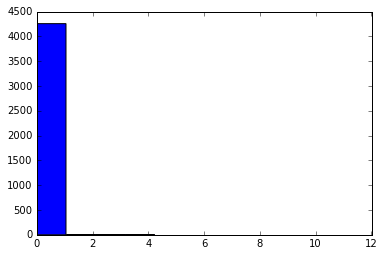

In [47]:
plt.hist(saraTotal.gsr)

In [48]:
# Features pulled from review txt
saraTotal['Anxious'] = saraTotal['anxious']
saraTotal['xHeartrate'] = saraTotal['heartrate']
saraTotal['xSteps'] = saraTotal['steps']
saraTotal['xCalories'] = saraTotal['calories']
saraTotal['xGsr'] = saraTotal['gsr']
saraTotal['xSkintemp'] = saraTotal['skintemp']
saraTotal['xAirtemp'] = saraTotal['airtemp']
saraTotal['xWalk'] = saraTotal['walk']
saraTotal['xRun'] = saraTotal['run']
saraTotal['xBike'] = saraTotal['bike']


Anxious = saraTotal.iloc[:, 32].values.reshape(saraTotal.shape[0], 1)
xHeartrate = saraTotal.iloc[:, 24].values.reshape(saraTotal.shape[0], 1)
xSteps = saraTotal.iloc[:, 25].values.reshape(saraTotal.shape[0], 1)
xCalories = saraTotal.iloc[:, 26].values.reshape(saraTotal.shape[0], 1)
xGsr = saraTotal.iloc[:, 27].values.reshape(saraTotal.shape[0], 1)
xAirtemp = saraTotal.iloc[:, 28].values.reshape(saraTotal.shape[0], 1)
xWalk = saraTotal.iloc[:, 29].values.reshape(saraTotal.shape[0], 1)
xRun = saraTotal.iloc[:, 30].values.reshape(saraTotal.shape[0], 1)
xBike = saraTotal.iloc[:, 31].values.reshape(saraTotal.shape[0], 1)


In [49]:
# Xtoadd = np.concatenate((xHeartrate.astype(np.float64, copy=False), 
#                          xSteps.astype(np.float64, copy=False), 
#                          xCalories.astype(np.float64, copy=False), 
#                          xGsr.astype(np.float64, copy=False),
#                          xAirtemp.astype(np.float64, copy=False),
#                          xWalk.astype(np.float64, copy=False),
#                          xRun.astype(np.float64, copy=False), 
#                          xBike.astype(np.float64, copy=False)), axis=1)

Xtoadd = np.concatenate((xHeartrate, 
                         xSteps, 
                         xCalories, 
                         xGsr,
                         xAirtemp,
                         xWalk,
                         xRun, 
                         xBike), axis=1)


saraTotal.head()

,timestamp,heartrate,steps,calories,gsr,skintemp,airtemp,walk,run,bike,...,Anxious,xHeartrate,xSteps,xCalories,xGsr,xSkintemp,xAirtemp,xWalk,xRun,xBike
0,4/23/16 0:00,91,0,1.4,0.000059,92.3,89.6,0,0,0,...,0,91,0,1.4,0.000059,92.3,89.6,0,0,0
1,4/23/16 0:01,92,0,1.5,0.000059,92.3,89.6,0,0,0,...,0,92,0,1.5,0.000059,92.3,89.6,0,0,0
2,4/23/16 0:02,94,0,1.6,0.000062,92.3,89.6,0,0,0,...,0,94,0,1.6,0.000062,92.3,89.6,0,0,0
3,4/23/16 0:03,95,0,1.7,0.000059,92.3,89.6,0,0,0,...,0,95,0,1.7,0.000059,92.3,89.6,0,0,0
4,4/23/16 0:04,98,0,1.7,0.000061,92.3,89.6,0,0,0,...,0,98,0,1.7,0.000061,92.3,89.6,0,0,0


In [50]:
# performance measures
# report on training and test sets
global SVMerror, SVMacc, SVMtp, SVMtn, LRerror, LRacc, LRtp, LRtn, NBerror, NBacc, NBtp, NBtn, Perror, Pacc, Ptp, Ptn



def print_results(model):
    #print('Error rate on training set: ')
    erTRAIN = ((y_train != y_pred).sum() / X_train.shape[0])
    #print('Accuracy rate on training set: ')
    AccTRAIN = (1 - (y_train != y_pred).sum() / X_train.shape[0])
    #print('True positive rate on training tet:')
    TruPosTRAIN = ((y_train==True) & (y_pred==True)).sum() / y_train.sum()
    #TruNegTEST = (((y_train==False) & (y_pred_train==False)).sum() / (y_train.shape[0] - y_train.sum()))
    #print('**************')
    #('Error rate on test set: ')
    erTEST = ((y_test != y_pred_test).sum() / X_test.shape[0])
    #print('Accuracy rate on test set: ')
    AccTEST = (1 - (y_test != y_pred_test).sum() / X_test.shape[0])
    #print('True positive rate on test set')
    TruPosTEST = (((y_test==True) & (y_pred_test==True)).sum() / y_test.sum())
    #print('True negative rate on test set')
    TruNegTEST = (((y_test==False) & (y_pred_test==False)).sum() / (y_test.shape[0] - y_test.sum()))
    data_rows = [('Error Rate', erTRAIN, erTEST),
                 ('Accuracy Rate', AccTRAIN, AccTEST),
                 ('True Positives', TruPosTRAIN, TruPosTEST),
                 ('True Negatives', '--', TruNegTEST)]
    t = Table(rows=data_rows, names=(model, 'Training Set', 'Test Set'), meta={'name': model + ': Training and Test Set Results'})
    print(t)
    if model == 'SVM':
        SVMerror = erTEST
        SVMacc = AccTEST
        SVMtp = TruPosTEST
        SVMtn = TruNegTEST
        return(SVMerror, SVMacc, SVMtp, SVMtn)
    elif model == 'Logistic Regression':
        LRerror = erTEST
        LRacc = AccTEST
        LRtp = TruPosTEST
        LRtn = TruNegTEST
        return(LRerror, LRacc, LRtp, LRtn)
    elif model == 'Naive Bayes':
        NBerror = erTEST
        NBacc = AccTEST
        NBtp = TruPosTEST
        NBtn = TruNegTEST
        return(NBerror, NBacc, NBtp, NBtn)
    elif model == 'Perceptron':
        Perror = erTEST
        Pacc = AccTEST
        Ptp = TruPosTEST
        Ptn = TruNegTEST
        return(Perror, Pacc, Ptp, Ptn)
    print('done')
      
    #t.show_in_browser(jsviewer=True) 
    
    
def all_models_table():
    all_rows = [('SVM', SVMerror, SVMacc, SVMtp, SVMtn),
            ('Logistic Regression', LRerror, LRacc, LRtp, LRtn),
            ('Naive Bayes', NBerror, NBacc, NBtp, NBtn),
            ('Perceptron', Perror, Pacc, Ptp, Ptn)]
    tt = Table(rows=all_rows, names=('', 'Error Rate', 'Accuracy', 'True +', 'True -'), meta={'3/15/2016'})
    print(tt)

In [51]:
# convert additional features to sparse matrix and concatenate onto the bag of words sparse matrix
from scipy.sparse import csr_matrix, hstack
XtoaddSparse = csr_matrix(Xtoadd)
Xfinal = hstack([XtoaddSparse])
X = csr_matrix(Xfinal)

In [52]:
# convert additional features to sparse matrix and concatenate onto the bag of words sparse matrix
from scipy.sparse import csr_matrix, hstack
XtoaddSparse = csr_matrix(Xtoadd)
Xfinal = hstack([X, XtoaddSparse])
X = csr_matrix(Xtoadd)

# sparse.hstack(X, A) # error
# sparse.hstack(X.astype(Xtoadd), A) # cast X to object; return object
# sparse.hstack(X, A.astype(Xtoadd)) # cast A to float; return float
# hstack(X.A, A) # make X dense, result will be type object

In [53]:
X.shape
print(X)

  (0, 0)	91.0
  (0, 2)	1.4
  (0, 3)	5.86e-05
  (0, 4)	92.3
  (0, 5)	89.6
  (1, 0)	92.0
  (1, 2)	1.5
  (1, 3)	5.86e-05
  (1, 4)	92.3
  (1, 5)	89.6
  (2, 0)	94.0
  (2, 2)	1.6
  (2, 3)	6.23e-05
  (2, 4)	92.3
  (2, 5)	89.6
  (3, 0)	95.0
  (3, 2)	1.7
  (3, 3)	5.86e-05
  (3, 4)	92.3
  (3, 5)	89.6
  (4, 0)	98.0
  (4, 2)	1.7
  (4, 3)	6.09e-05
  (4, 4)	92.3
  (4, 5)	89.6
  :	:
  (4315, 4)	89.6
  (4315, 5)	85.1
  (4315, 6)	1.0
  (4316, 0)	70.0
  (4316, 2)	1.0
  (4316, 3)	8.21e-05
  (4316, 4)	89.6
  (4316, 5)	85.1
  (4316, 6)	1.0
  (4317, 0)	69.0
  (4317, 2)	1.0
  (4317, 3)	8.21e-05
  (4317, 4)	89.6
  (4317, 5)	85.1
  (4317, 6)	1.0
  (4318, 0)	68.0
  (4318, 2)	1.1
  (4318, 3)	8.16e-05
  (4318, 4)	89.6
  (4318, 5)	86.0
  (4319, 0)	69.0
  (4319, 2)	1.0
  (4319, 3)	8.68e-05
  (4319, 4)	89.6
  (4319, 5)	86.0


In [73]:
y = saraTotal.angry
# y = saraTotal.angry.values
# y = saraTotal.iloc[:, 20].values
y.shape


(4320,)

In [74]:
y.mean()

0.0

In [70]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [71]:
# def _assert_all_finite(X):
#     """Like assert_all_finite, but only for ndarray."""
#     X = np.asanyarray(X)
#     # First try an O(n) time, O(1) space solution for the common case that
#     # everything is finite; fall back to O(n) space np.isfinite to prevent
#     # false positives from overflow in sum method.
#     if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
#             and not np.isfinite(X).all()):
#         raise ValueError("Input contains NaN, infinity"
#                          " or a value too large for %r." % X.dtype)

In [61]:
# X_train = _assert_all_finite(X_train)
# X_test = _assert_all_finite(X_test)

print(y_train)
y_train.shape

[0 0 0 ..., 0 0 0]


(3024,)

In [62]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [66]:
print(X_train_std.shape)

(3024, 8)


In [68]:
y_train.mean()

0.0

In [64]:
# MODEL: SVM, linear
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('SVM')

ValueError: The number of class labels must be greater than one.

In [36]:
# MODEL: SVM, linear
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('SVM')

NameError: name 'X_train_std' is not defined

In [115]:
# MODEL: Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Naive Bayes')

 Naive Bayes   Training Set Test Set
-------------- ------------ --------
    Error Rate          0.0      0.0
 Accuracy Rate          1.0      1.0
True Positives          nan      nan
True Negatives           --   1296.0


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.0, 1.0, nan, 1296.0)

In [116]:
# Perceptron
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='perceptron')
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Perceptron')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: The number of class labels must be greater than one.

In [136]:
# features from Amazon.csv to add to feature set

# Features pulled from review txt
# data['reviewLen'] = data['Text'].str.len() #captures the amount of strings present in the review (i.e. review length)
# data['hasEP'] = data['Text'].str.contains('!') #captures the presences of an exclaimation point
saraTotal['time'] = saraTotal['timestamp']
saraTotal['heart'] = saraTotal['heartrate']
saraTotal['steps'] = saraTotal['steps']
saraTotal['calories'] = saraTotal['calories']
saraTotal['gsr'] = saraTotal['gsr']
saraTotal['skintemp'] = saraTotal['skintemp']
saraTotal['airtemp'] = saraTotal['airtemp']
saraTotal['walk'] = saraTotal['walk']
saraTotal['run'] = saraTotal['run']
saraTotal['bike'] = saraTotal['bike']
saraTotal['sleep'] = saraTotal['sleep']
# saraTotal['tempDiff'] = saraTotal['skintemp'] - saraTotal['airtemp']

# saraTotal['tempDiff'] = saraTotal['skintemp'] - saraTotal['airtemp']

In [41]:
# Taking values and making vectors
# XScore = data.iloc[:, 7].values.reshape(data.shape[0], 1)
# XreviewLen = data.iloc[:, 13].values.reshape(data.shape[0], 1)
# XhasEP = data.iloc[:, 14].values.reshape(data.shape[0], 1)
# XhasSemi = data.iloc[:, 15].values.reshape(data.shape[0], 1)

# # tempDiff = saraTotal.iloc[:, 24].values.reshape(data.shape[0], 1)
# time = saraTotal.iloc[:, 24].values.reshape(saraTotal.shape[0], 1)
# heart = saraTotal.iloc[:, 25].values.reshape(saraTotal.shape[0], 1)
# steps = saraTotal.iloc[:, 26].values.reshape(saraTotal.shape[0], 1)
# calories = saraTotal.iloc[:, 27].values.reshape(saraTotal.shape[0], 1)
# gsr = saraTotal.iloc[:, 28].values.reshape(saraTotal.shape[0], 1)
# skintemp = saraTotal.iloc[:, 29].values.reshape(saraTotal.shape[0], 1)
# airtemp = saraTotal.iloc[:, 30].values.reshape(saraTotal.shape[0], 1)
# walk = saraTotal.iloc[:, 24].values.reshape(saraTotal.shape[0], 1)
# run = saraTotal.iloc[:, 25].values.reshape(saraTotal.shape[0], 1)
# bike = saraTotal.iloc[:, 26].values.reshape(saraTotal.shape[0], 1)
# sleep = saraTotal.iloc[:, 27].values.reshape(saraTotal.shape[0], 1)

In [39]:

Xtoadd = np.concatenate((time, heart, steps, calories, gsr, skintemp, airtemp, walk, run, bike, sleep), axis=1)

saraTotal.head()

ValueError: all the input arrays must have same number of dimensions

In [43]:
y = saraTotal.iloc[:, 18].values
y = np.where(y == 'true', -1, 1)

# X = data.iloc[:, 35].values #punctuation count

# plt.scatter(X[:50, 0], X[:50, 1],
# ... color='red', marker='o', label='helpfulness')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  from ipykernel import kernelapp as app


In [11]:
# report on training and test sets
global SVMerror, SVMacc, SVMtp, SVMtn, LRerror, LRacc, LRtp, LRtn, NBerror, NBacc, NBtp, NBtn, Perror, Pacc, Ptp, Ptn



def print_results(model):
    #print('Error rate on training set: ')
    erTRAIN = ((y_train != y_pred).sum() / X_train.shape[0])
    #print('Accuracy rate on training set: ')
    AccTRAIN = (1 - (y_train != y_pred).sum() / X_train.shape[0])
    #print('True positive rate on training tet:')
    TruPosTRAIN = ((y_train==True) & (y_pred==True)).sum() / y_train.sum()
    #TruNegTEST = (((y_train==False) & (y_pred_train==False)).sum() / (y_train.shape[0] - y_train.sum()))
    #print('**************')
    #('Error rate on test set: ')
    erTEST = ((y_test != y_pred_test).sum() / X_test.shape[0])
    #print('Accuracy rate on test set: ')
    AccTEST = (1 - (y_test != y_pred_test).sum() / X_test.shape[0])
    #print('True positive rate on test set')
    TruPosTEST = (((y_test==True) & (y_pred_test==True)).sum() / y_test.sum())
    #print('True negative rate on test set')
    TruNegTEST = (((y_test==False) & (y_pred_test==False)).sum() / (y_test.shape[0] - y_test.sum()))
    data_rows = [('Error Rate', erTRAIN, erTEST),
                 ('Accuracy Rate', AccTRAIN, AccTEST),
                 ('True Positives', TruPosTRAIN, TruPosTEST),
                 ('True Negatives', '--', TruNegTEST)]
    t = Table(rows=data_rows, names=(model, 'Training Set', 'Test Set'), meta={'name': model + ': Training and Test Set Results'})
    print(t)
    if model == 'SVM':
        SVMerror = erTEST
        SVMacc = AccTEST
        SVMtp = TruPosTEST
        SVMtn = TruNegTEST
        return(SVMerror, SVMacc, SVMtp, SVMtn)
    elif model == 'Logistic Regression':
        LRerror = erTEST
        LRacc = AccTEST
        LRtp = TruPosTEST
        LRtn = TruNegTEST
        return(LRerror, LRacc, LRtp, LRtn)
    elif model == 'Naive Bayes':
        NBerror = erTEST
        NBacc = AccTEST
        NBtp = TruPosTEST
        NBtn = TruNegTEST
        return(NBerror, NBacc, NBtp, NBtn)
    elif model == 'Perceptron':
        Perror = erTEST
        Pacc = AccTEST
        Ptp = TruPosTEST
        Ptn = TruNegTEST
        return(Perror, Pacc, Ptp, Ptn)
    print('done')
      
    #t.show_in_browser(jsviewer=True) 
    
    
def all_models_table():
    all_rows = [('SVM', SVMerror, SVMacc, SVMtp, SVMtn),
            ('Logistic Regression', LRerror, LRacc, LRtp, LRtn),
            ('Naive Bayes', NBerror, NBacc, NBtp, NBtn),
            ('Perceptron', Perror, Pacc, Ptp, Ptn)]
    tt = Table(rows=all_rows, names=('', 'Error Rate', 'Accuracy', 'True +', 'True -'), meta={'3/15/2016'})
    print(tt)

In [ ]:
# vectorize Bag of Words from review text; as sparse matrix
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
X = hv.transform(data.Text)
X.shape
# (455000, 131072)

# # vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import TfidfVectorizer
# tv = TfidfVectorizer(min_df=1, ngram_range=(2,17))
# X = tv.fit_transform(data.Text)

In [24]:
# convert additional features to sparse matrix and concatenate onto the bag of words sparse matrix
from scipy.sparse import csr_matrix, hstack
XtoaddSparse = csr_matrix(Xtoadd)
Xfinal = hstack([X, XtoaddSparse])
X = csr_matrix(Xfinal)

TypeError: no supported conversion for types: (dtype('O'),)

In [25]:
# define y
y = data.iloc[:, 12].values
y.shape

(455000,)

In [26]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [27]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
# decision tree classifier

# from sklearn import tree
# X = [[0, 0], [1, 1]]
# Y = [0, 1]
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, Y)

In [29]:
# MODEL: SVM, linear
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('SVM')

     SVM          Training Set      Test Set   
-------------- ----------------- --------------
    Error Rate 0.000888540031397   0.1523003663
 Accuracy Rate    0.999111459969   0.8476996337
True Positives    0.992853452729 0.444888577995
True Negatives                -- 0.879566458223


(0.15230036630036631,
 0.84769963369963364,
 0.44488857799540321,
 0.87956645822298463)

In [30]:
# MODEL: logistic regression
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=0.00001)
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Logistic Regression')

Logistic Regression    Training Set      Test Set   
------------------- ----------------- --------------
         Error Rate 0.000781789638932 0.144505494505
      Accuracy Rate    0.999218210361 0.855494505495
     True Positives    0.993714482521 0.433996202658
     True Negatives                -- 0.888839698639


(0.14450549450549449,
 0.85549450549450556,
 0.43399620265813932,
 0.88883969863945045)

In [31]:
# MODEL: Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Naive Bayes')

 Naive Bayes     Training Set       Test Set   
-------------- ---------------- ---------------
    Error Rate 0.00194662480377 0.0805054945055
 Accuracy Rate   0.998053375196  0.919494505495
True Positives   0.999354227656  0.328969721195
True Negatives               --   0.96621156902


(0.080505494505494504,
 0.91949450549450551,
 0.32896972119516338,
 0.96621156901962957)

In [32]:
# Perceptron
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='perceptron')
clf.fit(X_train_std, y_train)
y_pred = clf.fit(X_train_std, y_train).predict(X_train_std)
y_pred_test = clf.predict(X_test_std)
print_results('Perceptron')

  Perceptron      Training Set      Test Set   
-------------- ----------------- --------------
    Error Rate 0.000813186813187 0.153282051282
 Accuracy Rate    0.999186813187 0.846717948718
True Positives    0.993542276563 0.443089837114
True Negatives                --  0.87864941143


(0.15328205128205127,
 0.8467179487179487,
 0.44308983711402017,
 0.87864941142988151)